In [18]:
path = r'/Users/boukaskasbrahim/Desktop/Achievement4_Project/Original Data'
df_cust = pd.read_csv(os.path.join(path, 'customers.csv'))

import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df_cust.head()
df_cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [9]:
# Renaming columns for clarity
df_cust.rename(columns={
    'user_id': 'customer_id',
    'Surnam': 'Surname',
    'First Name': 'first_name',
    'fam_status': 'family_status',
    'n_dependants': 'number_of_dependents'
}, inplace=True)

# Droping unnecessary personal columns
df_cust.drop(columns=['first_name', 'Surname'], inplace=True)

# Convert date to datetime
df_cust['date_joined'] = pd.to_datetime(df_cust['date_joined'])

# Checking
df_cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   customer_id           206209 non-null  int64         
 1   Gender                206209 non-null  object        
 2   STATE                 206209 non-null  object        
 3   Age                   206209 non-null  int64         
 4   date_joined           206209 non-null  datetime64[ns]
 5   number_of_dependents  206209 non-null  int64         
 6   family_status         206209 non-null  object        
 7   income                206209 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 12.6+ MB


In [12]:
ords_prods_merge.rename(columns={'user_id': 'customer_id'}, inplace=True)

df_final = ords_prods_merge.merge(df_cust, on='customer_id', how='outer')


In [13]:
df_final.info()
df_final.head()
df_final[['customer_id', 'Gender', 'Age', 'income']].sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 21 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int64         
 1   customer_id             int64         
 2   order_number            int64         
 3   order_dow               int64         
 4   order_hour_of_day       int64         
 5   days_since_prior_order  float64       
 6   product_id              int64         
 7   add_to_cart_order       int64         
 8   reordered               int64         
 9   product_name            object        
 10  aisle_id                int64         
 11  department_id           int64         
 12  prices                  float64       
 13  _merge                  category      
 14  Gender                  object        
 15  STATE                   object        
 16  Age                     int64         
 17  date_joined             datetime64[ns]
 18  

,customer_id,Gender,Age,income
9941568,63206,Male,61,96433
20620743,130986,Male,64,52917
4836013,30844,Female,26,87714
9608602,60969,Female,53,115568
3083179,19822,Female,60,117917


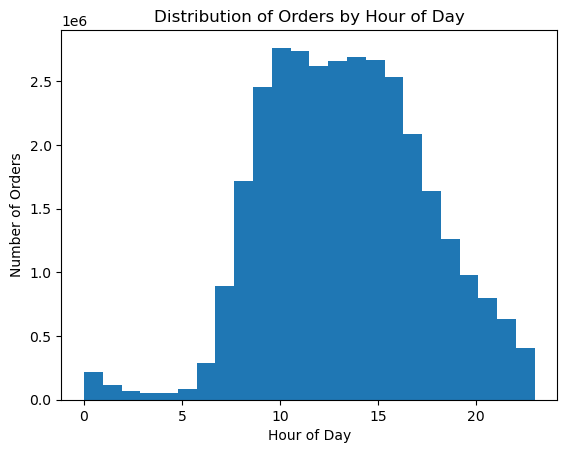

In [19]:
df_final['order_hour_of_day'].plot.hist(bins=24)
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.savefig(os.path.join(path, 'orders_by_hour.png'))
plt.show()


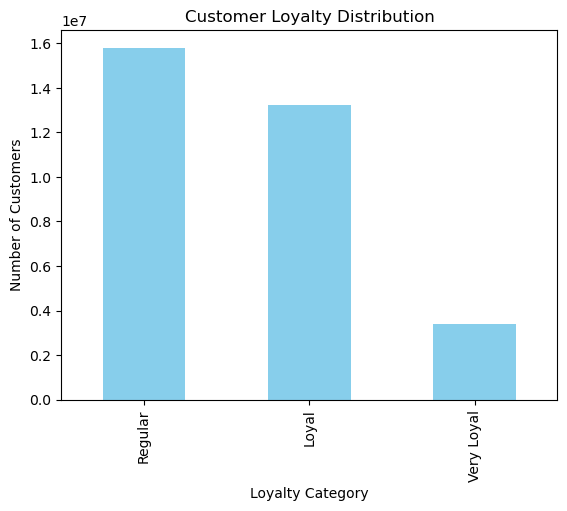

In [24]:
df_final['loyalty_flag'].value_counts().plot.bar(color='skyblue')
plt.title('Customer Loyalty Distribution')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Customers')
plt.savefig(os.path.join(path, 'loyalty_distribution.png'))
plt.show()


This bar chart shows the distribution of customers across different loyalty categories.  
Most customers fall into the "Regular" and "Loyal" groups, while a smaller portion are classified as "Very Loyal".  



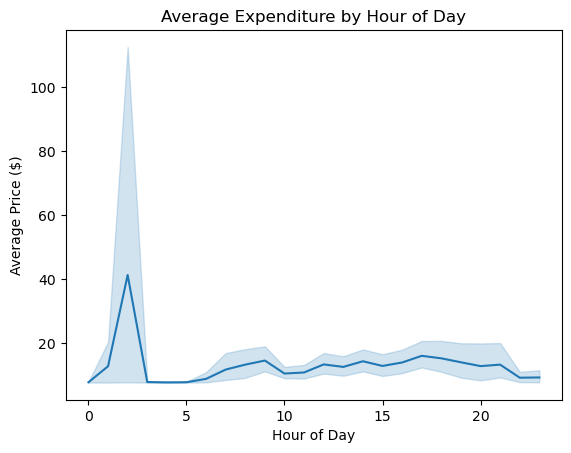

In [25]:
np.random.seed(4)  
sample = df_final.sample(frac=0.05) 

sns.lineplot(data=sample, x='order_hour_of_day', y='prices')
plt.title('Average Expenditure by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price ($)')
plt.savefig(os.path.join(path, 'expenditure_by_hour.png'))
plt.show()


This line chart compares average product prices across different order hours.  
It shows whether customers tend to spend more at certain times of day, highlighting possible peak hours for higher-value orders.


In [ ]:
np.random.seed(4)
sample = df_final.sample(frac=0.05)  

sns.lineplot(data=sample, x='Age', y='number_of_dependents')
plt.title('Age vs. Number of Dependents')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')
plt.savefig(os.path.join(path, 'age_dependents.png'))
plt.show()


This line chart shows the relationship between customer age and the number of dependents.  
It helps identify demographic patterns, such as which age groups are more likely to have dependents, which is useful for family-focused marketing.


In [ ]:
np.random.seed(4)
sample = df_final.sample(frac=0.05)

sns.scatterplot(data=sample, x='Age', y='income', alpha=0.3)
plt.title('Age vs. Income Distribution')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.savefig(os.path.join(path, 'age_income.png'))
plt.show()


This scatterplot illustrates the relationship between age and income.  
It shows whether income generally increases with age and highlights variability among customers within the same age groups.


### Note on Sampling for Visualizations

Since the dataset contains over 32 million rows, plotting the full data would be very slow and resource-intensive.  
To make the charts run faster while still keeping them representative, I used **random sampling (5% of the data)**.  
This approach reduces processing time and memory usage but still shows the overall patterns and trends accurately.


In [1]:
ords_prods_merge.shape
customers.shape


NameError: name 'ords_prods_merge' is not defined

In [2]:
import pandas as pd


In [3]:
ords_prods_merge = pd.read_pickle(r"/Users/boukaskasbrahim/Desktop/Achievement4_Project/Prepared Data/ords_prods_merge.pkl")
customers = pd.read_csv(r"/Users/boukaskasbrahim/Desktop/Achievement4_Project/Original Data/customers.csv")


In [4]:
print(ords_prods_merge.shape)
print(customers.shape)


(32434212, 14)
(206209, 10)


In [5]:
ords_prods_cust_merge = ords_prods_merge.merge(customers, on="customer_id", how="left")


KeyError: 'customer_id'

In [6]:
print("ords_prods_merge columns:", ords_prods_merge.columns.tolist())
print("customers columns:", customers.columns.tolist())


ords_prods_merge columns: ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', '_merge']
customers columns: ['user_id', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income']


In [7]:
ords_prods_merge.rename(columns={'user_id': 'customer_id'}, inplace=True)


In [9]:
print("ords_prods_merge columns:", ords_prods_merge.columns.tolist())
print("customers columns:", customers.columns.tolist())

ords_prods_merge columns: ['order_id', 'customer_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', '_merge']
customers columns: ['user_id', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income']


In [10]:
ords_prods_cust_merge = ords_prods_merge.merge(customers, on="customer_id", how="left")


KeyError: 'customer_id'

In [11]:
print("ords_prods_merge columns:\n", ords_prods_merge.columns.tolist())
print("customers columns:\n", customers.columns.tolist())


ords_prods_merge columns:
 ['order_id', 'customer_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'prices', '_merge']
customers columns:
 ['user_id', 'First Name', 'Surnam', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income']


In [12]:
# Rename user_id in customers to customer_id
customers.rename(columns={'user_id': 'customer_id'}, inplace=True)

# Now merge on customer_id
ords_prods_cust_merge = ords_prods_merge.merge(customers, on="customer_id", how="left")

# Quick check
print(ords_prods_cust_merge.shape)
print(ords_prods_cust_merge.head())


(32434212, 23)
   order_id  customer_id  order_number  order_dow  order_hour_of_day  \
0   2539329            1             1          2                  8   
1   2539329            1             1          2                  8   
2   2539329            1             1          2                  8   
3   2539329            1             1          2                  8   
4   2539329            1             1          2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                     NaN       14084                  2          0   
2                     NaN       12427                  3          0   
3                     NaN       26088                  4          0   
4                     NaN       26405                  5          0   

                              product_name  ...  _merge  First Name  Surnam  \
0                                     Soda  ..

In [13]:
ords_prods_cust_merge.to_pickle(r"/Users/boukaskasbrahim/Desktop/Achievement4_Project/Prepared Data/ords_prods_customers.pkl")
